### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
# Read data from csv file

data = pd.read_csv('data/coupons.csv')

In [56]:
# Use head to print top 5 rows

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [59]:
# find rows and column shape

data.shape

(12684, 26)

In [61]:
# find out data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [63]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [65]:
# find 'total' null value count

data.isnull().sum().sum()

13370

In [67]:
# find the null value count for all the columns

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<B> @Finding </B>

From above, we can find a total of 6 colums containing null values and of which 'car' column has the most number of null values

In [70]:
# find out statistics of the table

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

## Fill & replace null values

The primary column to fix 0 with appropriate value is 'car'.

In [75]:
#  find out all the unique values in 'car' column

data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [77]:
# make a copy of data

df = data

In [79]:
# populate null values with 'no'

df['car']=df['car'].fillna(value='no')

In [81]:
# populate remaining non null values in 'car'column as 'yes' & 'no'

df = df.replace({'car' : {'Scooter and motorcycle' : 'yes', 'crossover' : 'yes', 'Mazda5' : 'yes',
                          'do not drive' : 'no', 'Car that is too old to install Onstar :D' : 'no'}})

In [83]:
# find out 'total' null value count

df.isnull().sum().sum()

794

## Drop null values

In [86]:
# drop null rows

df = df.dropna()

In [88]:
# make sure all null values are dropped

df.isnull().sum().sum()

0

4. What proportion of the total observations chose to accept the coupon? 

In [91]:
coupon_accepted = df['Y'].value_counts()[1]

total_coup_offered = df['Y'].count()

prop_of_coup_acceptance = round((coupon_accepted/total_coup_offered)*100,2)
prop_of_coup_acceptance

56.93

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Type by Count')

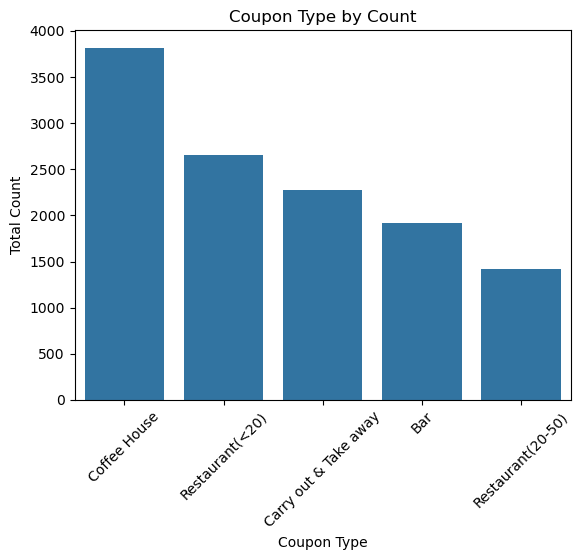

In [94]:
# Plot using bar chart

g1 = sns.barplot(x=df.coupon.value_counts().index, y=df.coupon.value_counts())
g1.tick_params(axis='x', rotation=45)
g1.set(xlabel='Coupon Type', ylabel='Total Count')
g1.set_title('Coupon Type by Count')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram')

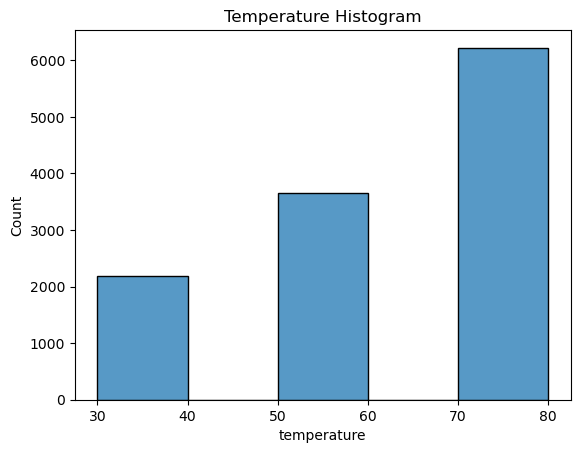

In [96]:
g3 = sns.histplot(data=df, x='temperature', binwidth=10)
g3.set_title('Temperature Histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [99]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [100]:
df_bar_coupons = df.query("coupon == 'Bar'")

In [104]:
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [106]:
df_bar_coupons.shape

(1913, 26)

2. What proportion of bar coupons were accepted?


In [109]:
# we need to find out accepted vs offered so

bar_coup_accepted = df_bar_coupons['Y'].value_counts()[1]
total_bar_coup_offered = df_bar_coupons['Y'].count()

prop_of_bar_coup_acceptance = round((bar_coup_accepted/total_bar_coup_offered)*100,2)
prop_of_bar_coup_acceptance

41.19

In [111]:
# we need to find out accepted vs offered so

bar_coup_not_accepted = df_bar_coupons['Y'].value_counts()[0]

prop_of_bar_coup_not_accepted = round((bar_coup_not_accepted/total_bar_coup_offered)*100,2)
prop_of_bar_coup_not_accepted

58.81

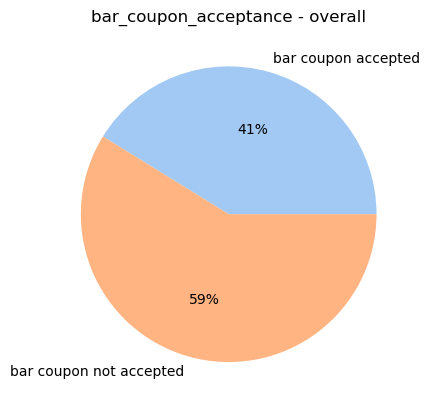

In [113]:
data = [prop_of_bar_coup_acceptance, prop_of_bar_coup_not_accepted]
labels = ['bar coupon accepted', 'bar coupon not accepted']
colors = sns.color_palette('pastel')[0:2]

# plot pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coup_acceptance - overall')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [116]:
# find all the unique values for the Bar column
df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [118]:
# define conditions
more_frequent = ['gt8', '4~8']

df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)

df_bar_coupons['Bar_More_Frequent'].value_counts()

Bar_More_Frequent
0    1720
1     193
Name: count, dtype: int64

In [120]:
# Count of who went to bar frequently = 193
# Count of who did not go to bar frequently = 1720

In [122]:
bar_coup_accetd_more_freq_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_freq_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].count()
prop_of_bar_coup_acceptance_freq_visitors = round((bar_coup_accetd_more_freq_visitors/total_bar_coup_offrd_freq_visitors)*100,2)
prop_of_bar_coup_acceptance_freq_visitors

76.17

In [124]:
bar_coup_accetd_less_freq_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].value_counts()[1]
total_bar_coup_offrd_less_freq_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].count()
prop_of_bar_coup_acceptance_less_freq_visitors = round((bar_coup_accetd_less_freq_visitors/total_bar_coup_offrd_less_freq_visitors)*100,2)
prop_of_bar_coup_acceptance_less_freq_visitors

37.27

#75% frequent visitors to bar have accepted the coupons compared to 37% who less frequently visited

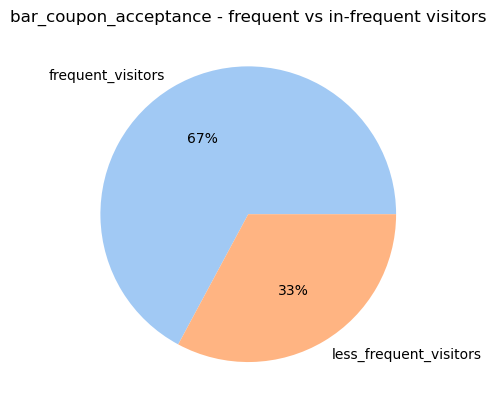

In [127]:
#define data
data = [prop_of_bar_coup_acceptance_freq_visitors, prop_of_bar_coup_acceptance_less_freq_visitors]
labels = ['frequent_visitors', 'less_freq_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coup_acceptance - frequent vs in-frequent visitors')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [130]:
# define conditions

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0
    
df_bar_coupons['Bar_freq_Age'] = df_bar_coupons.apply(conditions, axis=1)

In [132]:
df_bar_coupons[['Bar','age','Bar_freq_Age']].sample(10)

,Bar,age,Bar_freq_Age
4552,1~3,31,1
5829,1~3,50plus,1
12353,less1,31,0
11909,1~3,26,1
3941,less1,26,0
871,never,26,0
9516,never,31,0
6495,1~3,36,1
11617,less1,41,0
4071,never,36,0


In [134]:
bar_coup_accetd_more_freq_visitors_elder_age = df_bar_coupons.query("Bar_freq_Age == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_freq_visitors_elder_age = df_bar_coupons.query("Bar_freq_Age == 1")['Y'].count()
prop_of_bar_coup_acceptance_freq_visitors_elderly_age = round((bar_coup_accetd_more_freq_visitors_elder_age/total_bar_coup_offrd_freq_visitors_elder_age)*100,2)
prop_of_bar_coup_acceptance_freq_visitors_elderly_age

68.98

In [136]:
bar_coup_accetd_less_freq_visitors_younger_age = df_bar_coupons.query("Bar_freq_Age == 0")['Y'].value_counts()[1]
total_bar_coup_offrd_less_freq_visitors_younger_age = df_bar_coupons.query("Bar_freq_Age == 0")['Y'].count()
prop_of_bar_coup_acceptance_less_freq_visitors_younger_age = round((bar_coup_accetd_less_freq_visitors_younger_age/total_bar_coup_offrd_less_freq_visitors_younger_age)*100,2)
prop_of_bar_coup_acceptance_less_freq_visitors_younger_age

33.77

#Finding

From above, we can find the 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%)

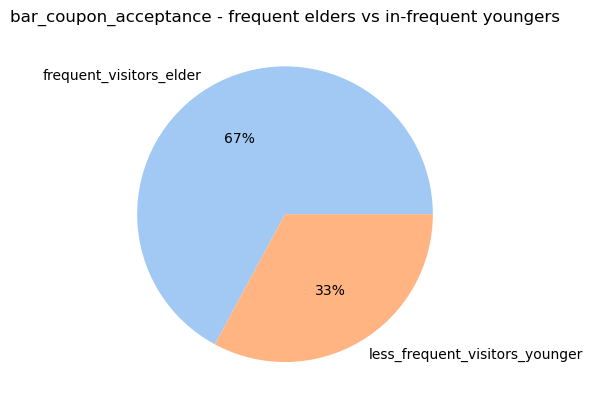

In [139]:
#define data
data = [prop_of_bar_coup_acceptance_freq_visitors_elderly_age, prop_of_bar_coup_acceptance_less_freq_visitors_younger_age]
labels = ['frequent_visitors_elder', 'less_freq_visitors_younger']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coup_acceptance - frequent elders vs in-frequent youngers')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [142]:
df_bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [144]:
df_bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [146]:
# define conditons

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
   

df_bar_coupons['Bar_freq_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)

In [148]:
df_bar_coupons[['Bar','age','occupation','Bar_freq_Age_Job']].sample(10)

,Bar,age,occupation,Bar_freq_Age_Job
10084,never,31,Arts Design Entertainment Sports & Media,0
10158,less1,31,Architecture & Engineering,0
7027,never,50plus,Retired,0
8804,never,36,Computer & Mathematical,0
9305,never,below21,Student,0
7380,never,below21,Student,0
3989,less1,36,Business & Financial,0
1091,never,41,Arts Design Entertainment Sports & Media,0
8710,1~3,31,Business & Financial,1
4940,1~3,31,Production Occupations,1


In [150]:
bar_coup_accetd_more_freq_visitors_elder_age_job = df_bar_coupons.query("Bar_freq_Age_Job == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_freq_visitors_elder_age_job = df_bar_coupons.query("Bar_freq_Age_Job == 1")['Y'].count()
prop_of_bar_coup_acceptance_freq_visitors_elderly_age_job = round((bar_coup_accetd_more_freq_visitors_elder_age_job/total_bar_coup_offrd_freq_visitors_elder_age_job)*100,2)
prop_of_bar_coup_acceptance_freq_visitors_elderly_age_job

69.04

In [152]:
bar_coup_accetd_less_freq_visitors_younger_age_job = df_bar_coupons.query("Bar_freq_Age_Job == 0")['Y'].value_counts()[1]
total_bar_coup_offrd_less_freq_visitors_younger_age_job = df_bar_coupons.query("Bar_freq_Age_Job == 0")['Y'].count()
prop_of_bar_coup_acceptance_less_freq_visitors_younger_age_job = round((bar_coup_accetd_less_freq_visitors_younger_age_job/total_bar_coup_offrd_less_freq_visitors_younger_age_job)*100,2)
prop_of_bar_coup_acceptance_less_freq_visitors_younger_age_job

29.61

<B> @Finding </B>

From above, we can find the 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%)

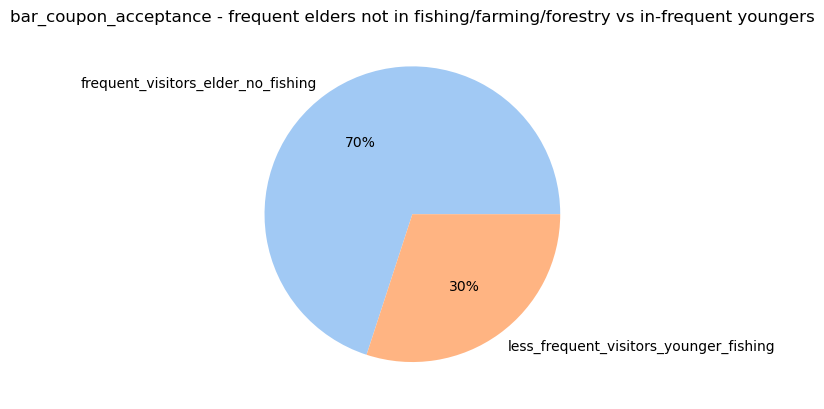

In [155]:
#define data
data = [prop_of_bar_coup_acceptance_freq_visitors_elderly_age_job, prop_of_bar_coup_acceptance_less_freq_visitors_younger_age_job]
labels = ['frequent_visitors_elder_no_fishing', 'less_freq_visitors_younger_fishing']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coup_acceptance - frequent elders not in fishing/farming/forestry vs in-frequent youngers')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [158]:
df_bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [160]:
# define conditions

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
df_bar_coupons['Bar_freq_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

In [162]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','maritalStatus','Bar_freq_Age_Marital']].sample(10)

,Bar,age,maritalStatus,Bar_freq_Age_Marital
10972,less1,21,Single,0
9202,1~3,21,Single,1
547,never,46,Single,0
1474,less1,46,Married partner,0
8372,less1,50plus,Married partner,0
12225,less1,21,Married partner,0
7756,4~8,21,Unmarried partner,1
7768,4~8,21,Unmarried partner,1
12682,never,26,Single,0
10089,never,31,Single,0


In [164]:
bar_coup_accetd_more_freq_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_freq_Age_Marital == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_freq_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_freq_Age_Marital == 1")['Y'].count()
prop_of_bar_coup_acceptance_freq_visitors_elderly_age_not_widowed = round((bar_coup_accetd_more_freq_visitors_elder_age_not_widowed/total_bar_coup_offrd_freq_visitors_elder_age_not_widowed)*100,2)
prop_of_bar_coup_acceptance_freq_visitors_elderly_age_not_widowed

69.04

In [166]:
# define conditions

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
df_bar_coupons['Bar_freq_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

In [168]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_freq_Age_30']].sample(10)

,Bar,age,Bar_freq_Age_30
5982,never,50plus,0
10158,less1,31,0
2839,less1,50plus,0
3105,never,26,0
11616,less1,41,0
12620,never,21,0
10413,less1,26,0
8438,never,41,0
7300,never,26,0
11825,less1,50plus,0


In [170]:
bar_coup_accetd_more_freq_visitors_younger_age = df_bar_coupons.query("Bar_freq_Age_30 == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_freq_visitors_younger_age = df_bar_coupons.query("Bar_freq_Age_30 == 1")['Y'].count()
prop_of_bar_coup_acceptance_freq_visitors_younger_age = round((bar_coup_accetd_more_freq_visitors_younger_age/total_bar_coup_offrd_freq_visitors_younger_age)*100,2)
prop_of_bar_coup_acceptance_freq_visitors_younger_age

71.95

In [172]:
df_bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [174]:
df_bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [176]:
# define conditions

def conditions(s):
    if s['RestaurantLessThan20'] in ['4~8', 'gt8'] and s['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

In [178]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['RestaurantLessThan20','income','Bar_cheap_restaurant_low_income']].sample(10)

,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
10774,1~3,$50000 - $62499,0
11308,gt8,$62500 - $74999,0
667,1~3,$100000 or More,0
999,never,$25000 - $37499,0
580,1~3,$37500 - $49999,0
3391,gt8,$37500 - $49999,1
8292,less1,$37500 - $49999,0
9869,less1,$25000 - $37499,0
9214,4~8,$75000 - $87499,0
5159,1~3,$100000 or More,0


In [180]:
bar_coup_accetd_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts()[1]
total_bar_coup_offrd_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()
prop_of_bar_coup_acceptance_cheap_restaurant_low_income = round((bar_coup_accetd_cheap_restaurant_low_income/total_bar_coup_offrd_cheap_restaurant_low_income)*100,2)
prop_of_bar_coup_acceptance_cheap_restaurant_low_income

45.65

# Findings

'frequent younger visitors' who accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%)

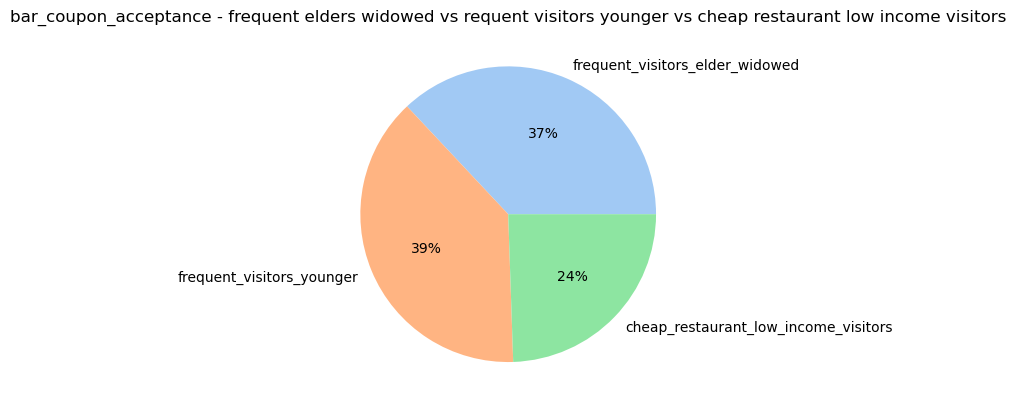

In [183]:
#define data
data = [prop_of_bar_coup_acceptance_freq_visitors_elderly_age_not_widowed, prop_of_bar_coup_acceptance_freq_visitors_younger_age, prop_of_bar_coup_acceptance_cheap_restaurant_low_income]
labels = ['frequent_visitors_elder_widowed', 'frequent_visitors_younger', 'cheap_restaurant_low_income_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#plot pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coup_acceptance - frequent elders widowed vs requent visitors younger vs cheap restaurant low income visitors')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#more frequent visitors to bar have accepted the coupons to the most about 76% compared to the less frequent visitors who have showed only less interest in coupon acceptance about 37%.
#
frequent elderly visitors to bar have accepted the coupons to the mosabout  (6 ) compared to less frequent young visitors who have showed only less interesabout  (3%
#

frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the mabout st 70%) compared to less frequent young visitors with farming/fishing/forestry job who have showed only less interabout st 3
#).

frequent younger visitors to bar have accepted the coupons to theabout mos (39%) compared to frequent visitors that are elder and widowed who have slightly less intabout res (37%) or frequent visitors to cheap restaurants with low income who have even less intabout res (24%).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  